Logistic Regression Accuracy: 0.9


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1160\3654443951.py:47: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


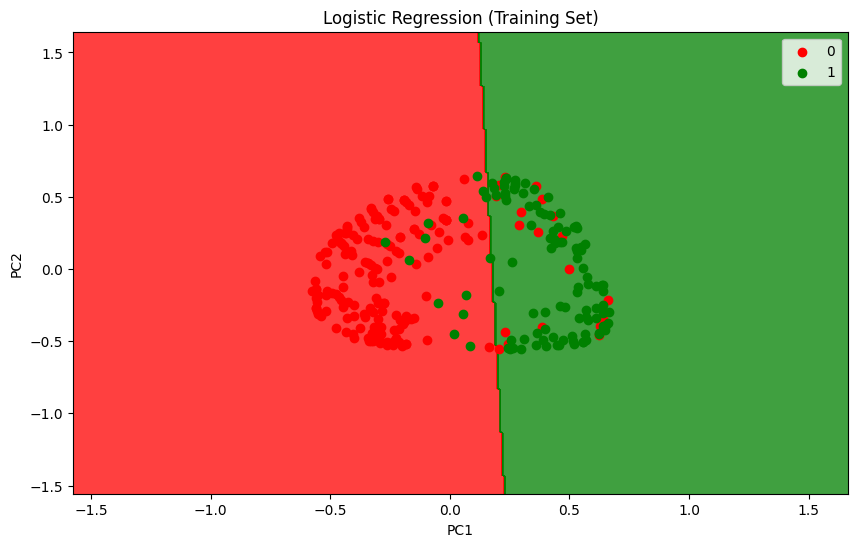

SVM Accuracy: 0.93


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1160\3654443951.py:47: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


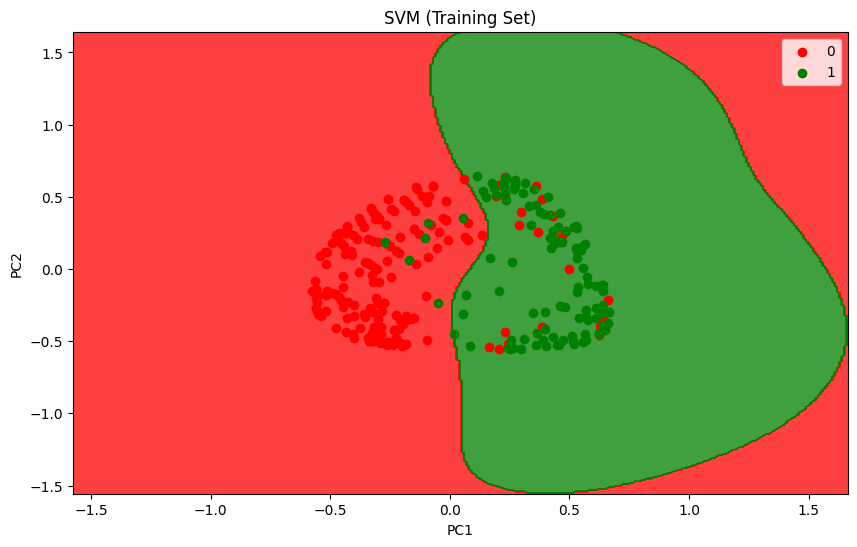

Decision Tree Accuracy: 0.89


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1160\3654443951.py:47: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


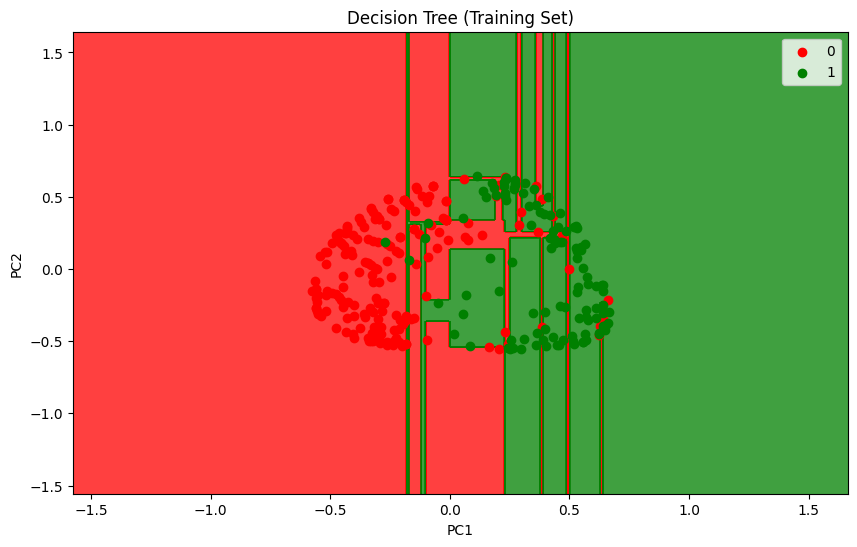

Random Forest Accuracy: 0.93


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1160\3654443951.py:47: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


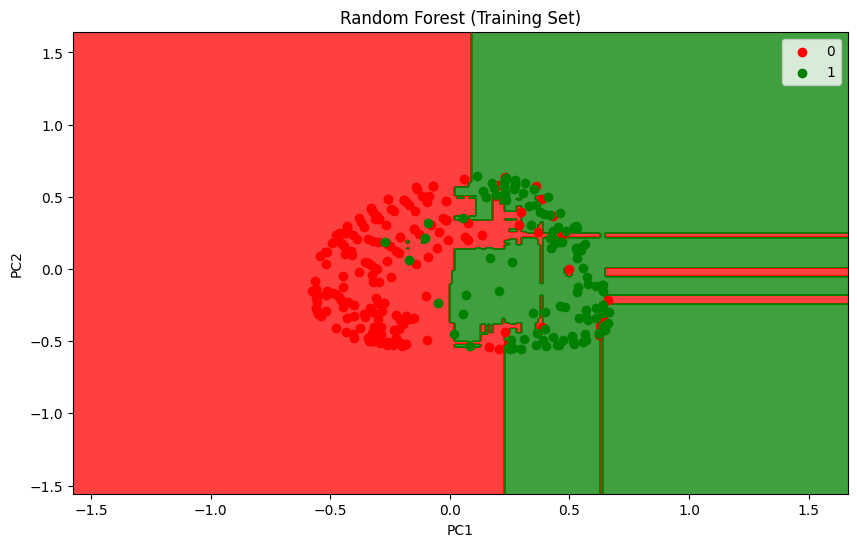

In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib.colors import ListedColormap

# Step 1: Load the Social Network Ads Dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

# Assuming dataset has columns like: 'Age', 'EstimatedSalary', 'Purchased'
X = dataset.iloc[:, [2, 3]].values  # Features (Age and Estimated Salary)
y = dataset.iloc[:, 4].values      # Target (Purchased)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Step 3: Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Step 4: Apply Kernel PCA (non-linear transformation)
kernel_pca = KernelPCA(n_components=2, kernel='rbf')  # Radial Basis Function Kernel
X_train_kpca = kernel_pca.fit_transform(X_train)
X_test_kpca = kernel_pca.transform(X_test)

# Step 5: Train and evaluate classifiers

# Function to plot decision boundaries
def plot_decision_boundaries(X_set, y_set, classifier, title):
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()

# 1. Logistic Regression
log_reg_classifier = LogisticRegression(random_state=0)
log_reg_classifier.fit(X_train_kpca, y_train)
y_pred_log_reg = log_reg_classifier.predict(X_test_kpca)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))

# Plot decision boundary for Logistic Regression
plt.figure(figsize=(10, 6))
plot_decision_boundaries(X_train_kpca, y_train, log_reg_classifier, 'Logistic Regression (Training Set)')
plt.show()

# 2. SVM (Support Vector Machine)
svc_classifier = SVC(kernel='rbf', random_state=0)
svc_classifier.fit(X_train_kpca, y_train)
y_pred_svc = svc_classifier.predict(X_test_kpca)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))

# Plot decision boundary for SVM
plt.figure(figsize=(10, 6))
plot_decision_boundaries(X_train_kpca, y_train, svc_classifier, 'SVM (Training Set)')
plt.show()

# 3. Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train_kpca, y_train)
y_pred_dt = dt_classifier.predict(X_test_kpca)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Plot decision boundary for Decision Tree
plt.figure(figsize=(10, 6))
plot_decision_boundaries(X_train_kpca, y_train, dt_classifier, 'Decision Tree (Training Set)')
plt.show()

# 4. Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=0)
rf_classifier.fit(X_train_kpca, y_train)
y_pred_rf = rf_classifier.predict(X_test_kpca)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Plot decision boundary for Random Forest
plt.figure(figsize=(10, 6))
plot_decision_boundaries(X_train_kpca, y_train, rf_classifier, 'Random Forest (Training Set)')
plt.show()
